# Implémentation du KNN + Visualisation 2D + Curse of Dimensionality  


Ce notebook implémente :
1. Un algorithme **k-NN from scratch**
2. Un dataset **2D avec 3 classes**
3. Une **visualisation graphique**
4. Une **extension en haute dimension**
5. Une analyse du phénomène **Curse of Dimensionality**


### 🔹 1. Importation des bibliothèques




In [1]:
import numpy as np
import math as m
import matplotlib.pyplot as plt

### 🔹 2. Implémentation du KNN (from scratch)
L’algorithme suit 3 étapes :

1. Calculer la distance entre le point à prédire et tous les points du dataset

2. Trier les distances pour sélectionner les k plus proches voisins

3. Faire un vote majoritaire parmi les k voisins

In [2]:
# ---------- KNN FUNCTION ----------
def knn(data, u, k):
    def distance_euc(u, v):
        d = 0 #distance
        p = u.shape[0]
        for j in range(p):
            d += (u[j] - v[j]) ** 2
        return m.sqrt(d)

    def classe_major(liste_knn, classes):
        #liste contient des tuples (distance, classe)
        #pour chaque classe on compte le nbr d'occurrences
        res = {c: len([e for e in liste_knn if e[1] == c]) for c in classes}
        return max(res, key=lambda i: res[i]) #max terme de value

    X, y = data
    h, w = X.shape
    liste_knn = []
    classes = np.unique(y) # les classes sans repetition

    for i in range(h):
        v = X[i, :] #la ligne i
        dist = distance_euc(u, v)
        liste_knn.append((dist, y[i]))

    liste_knn.sort(key=lambda tup: tup[0]) #tri selon dist
    c = classe_major(liste_knn[:k], classes)
    return c

### 🔹 3. Importation d'une dataset de 2 dimm sous form de CSV
Un fichier CSV contenant un dataset simple en 2 dimensions avec 3 classes.
Ce dataset nous permettra de tester notre implémentation du KNN.


In [3]:
# ---------- LOAD DATA FROM CSV ----------
file = "data.csv"  

data = np.genfromtxt(file, delimiter=",", dtype=str, skip_header=1)

# Extract features and labels
X_train = data[:, :2].astype(float)   # First 2 columns 
y_train = data[:, 2]                  # Last column = class labels

###  4. Test de KNN sur un point

In [5]:
# ---------- QUERY POINT ----------
u_query = np.array([3, 5.0]) 
k_value = 3


# ---------- RUN KNN ----------
prediction = knn((X_train, y_train), u_query, k_value)
print(f"Predicted Class: {prediction}")


Predicted Class: A


### 🔹 5. Visualisation du KNN en 2D

Représentons des points d’apprentissage dans un plan (X1, X2) avec leur classe.
Le point à prédire est affiché en rouge ★.
Cela nous permet de vérifier visuellement la cohérence du résultat obtenu par l’algorithme.

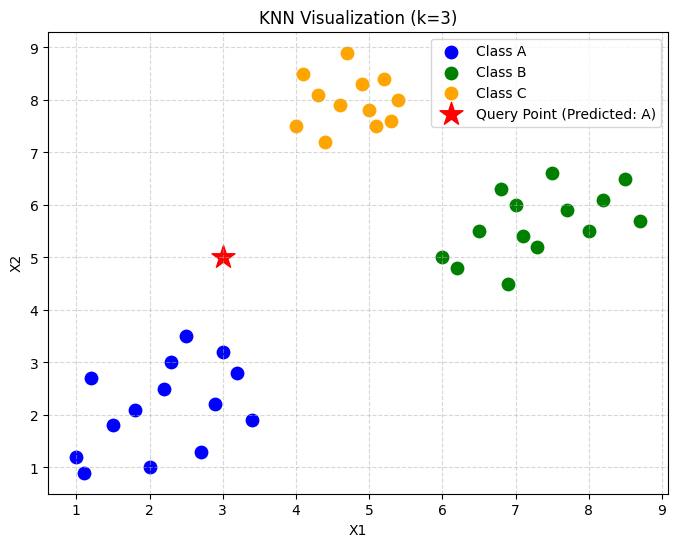

In [6]:
# ---------- VISUALIZATION ----------
plt.figure(figsize=(8, 6))

classes = np.unique(y_train)
colors = {'A': 'blue', 'B': 'green', 'C': 'orange'}

# Plot each class separately
for c in classes:
    plt.scatter(X_train[y_train == c, 0],
                X_train[y_train == c, 1],
                s=80,
                color=colors[c],
                label=f"Class {c}")

# Plot query point
plt.scatter(u_query[0], u_query[1],
            color='red', marker='*', s=300,
            label=f"Query Point (Predicted: {prediction})")

plt.title(f"KNN Visualization (k={k_value})")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

## 6. Analyse Graphique : Contraste vs Dimension (Échelle Log)
### 1. Définition de la métrique de Contraste

Cette fonction est le cœur de notre analyse. Pour évaluer l'impact de la dimensionnalité, nous utilisons une mesure de **contraste relatif**.

**Le principe :**
1. On génère un nuage de points aléatoires dans un hypercube de dimension `d`.
2. On calcule la distance Euclidienne entre un point de référence et tous les autres.
3. On compare la distance minimale ($D_{min}$) et maximale ($D_{max}$).

**La formule :**
$$Contraste = \frac{D_{max} - D_{min}}{D_{min}}$$

* Si le résultat est **élevé**, les voisins sont bien distincts.
* Si le résultat est **proche de 0**, tous les points sont à la même distance : c'est la **Malédiction de la Dimensionnalité**.

In [8]:
def calcul_contraste(dim, n_samples=1000):
    # Génération des données
    X = np.random.rand(n_samples, dim)
    u = X[0]

    # Calcul des distances
    diff = X[1:] - u
    dists = np.sqrt(np.sum(diff ** 2, axis=1))

    # Calcul du contraste
    d_min = np.min(dists)
    d_max = np.max(dists)

    return (d_max - d_min) / d_min


### 2. Simulation sur plusieurs dimensions

Nous lançons la simulation sur une échelle logarithmique de dimensions (de 2 à 3000).

* **Lissage (Moyenne) :** Comme les données sont aléatoires, nous calculons la moyenne sur 3 essais (`range(3)`) pour éviter d'avoir des résultats aberrants (bruit statistique).


In [ ]:
# Liste des dimensions (échelle log pour bien voir)
dims = [2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000, 3000]
contrastes = []


for dim in dims:
    # Moyenne sur 3 essais pour lisser un peu
    c = np.mean([calcul_contraste(dim) for _ in range(3)])
    contrastes.append(c)

    print(f"dim = {dim} contrast = {c:.3f}")


dim = 2 contrast = 48.732
dim = 5 contrast = 6.667
dim = 10 contrast = 3.202
dim = 20 contrast = 1.321
dim = 50 contrast = 0.630
dim = 100 contrast = 0.423
dim = 200 contrast = 0.291
dim = 500 contrast = 0.176
dim = 1000 contrast = 0.126
dim = 2000 contrast = 0.080
dim = 3000 contrast = 0.066


### 3. Visualisation Graphique (Échelle Logarithmique)

Ce graphique permet de visualiser l'effondrement des performances des algorithmes de distance (comme KNN).

* **Échelle Log (`plt.xscale('log')`) :** Indispensable car le phénomène critique se produit très tôt (entre la dimension 10 et 100), alors que nous testons jusqu'à 3000. Sans cela, le début de la courbe serait écrasé.
* **Grille détaillée (`which='both'`) :** Permet d'afficher les subdivisions de l'échelle logarithmique pour une lecture précise des dimensions intermédiaires.
* **Seuil critique :** La ligne rouge indique la zone où le contraste devient négligeable ($< 0.5$), rendant la distinction entre "proche" et "loin" presque impossible.

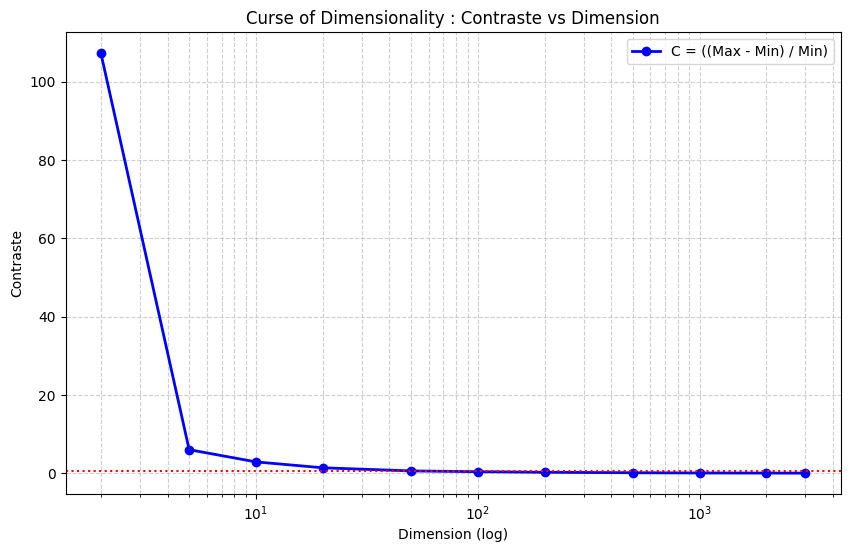

In [ ]:
# --- GRAPHIQUE ---
plt.figure(figsize=(10, 6))

plt.plot(dims, contrastes, marker='o', color='blue', linewidth=2, label='C = ((Max - Min) / Min)')

# échelle Logarithmique
plt.xscale('log')

plt.grid(True, which="both", linestyle='--', alpha=0.6)

plt.title("Curse of Dimensionality : Contraste vs Dimension")
plt.xlabel("Dimension (log)")
plt.ylabel("Contraste")
plt.legend()
plt.axhline(y=0.5, color='r', linestyle=':', label='Seuil critique (C < 0.5)')

plt.show()

### 🔹 7. Conclusion et Interprétation

Le graphique ci-dessus illustre parfaitement le phénomène de la **Malédiction de la Dimensionnalité** (*Curse of Dimensionality*).

**Observations clés :**
1.  **En basse dimension (d < 10) :** Le contraste est élevé (> 0.5). La distance entre le point le plus proche et le point le plus éloigné est significative. L'algorithme KNN est donc performant et fiable.
2.  **La chute de performance :** On observe une décroissance exponentielle du contraste lorsque la dimension augmente de 10 à 100.
3.  **En haute dimension (d > 1000) :** Le contraste tend vers 0. Cela signifie que **tous les points deviennent équidistants** les uns des autres. La notion de "plus proche voisin" perd son sens mathématique, rendant la distance Euclidienne inefficace pour discriminer les données.

**Conséquence pour le Machine Learning :**
Pour utiliser efficacement KNN sur des données à très haute dimension (comme des images ou du texte), il est souvent nécessaire d'appliquer au préalable des techniques de **réduction de dimension** (comme l'PCA ou t-SNE) pour projeter les données dans un espace où les distances ont de nouveau un sens.